# Теория вероятностей и математическая статистика (семинары)
## Урок 9. Линейная регрессия. Логистическая регрессия

In [1]:
import scipy.stats as stats 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
model = LinearRegression() 

## Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = \[35, 45, 190, 200, 40, 70, 54, 150, 120, 110\], 

ks = \[401, 574, 874, 919, 459, 739, 653, 902, 746, 832\]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.


### Решение
Визуализируем наши данные

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

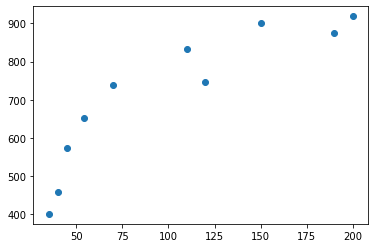

In [3]:
plt.scatter(zp,ks)
plt.show()

Вычислим коэффициенты b0 и b1 для нашей модели, а так же - коэффициент детерминации

In [4]:
n = len(zp)
b1 = (n*np.sum(zp*ks) - np.sum(zp)*np.sum(ks)) / (n*np.sum(zp**2) - np.sum(zp)**2)
b0 = np.mean(ks) - b1 * np.mean(zp)
r = (np.corrcoef(zp,ks)[1,0])**2
print(f'b0 = {b0}; b1 = {b1}; r = {r}')
# b0 - intercept
# b1 - slope
# r - coefficient of determination

b0 = 444.17735732435955; b1 = 2.6205388824027653; r = 0.7876386635293682


Проверим наши вычисления со встроенными функциями:

In [5]:
zp_reshaped = zp.reshape(-1,1)
model.fit(zp_reshaped, ks) 
r_sq = model.score(zp_reshaped, ks) 
print('coefficient of determination:', r_sq) 
print('intercept:', model.intercept_) 
print('slope:', model.coef_) 

coefficient of determination: 0.7876386635293686
intercept: 444.1773573243596
slope: [2.62053888]


Таким образом наша модель будет выглядеть:

$y = 444.18 + 2.62 * x$

Визуализируем нашу модель:

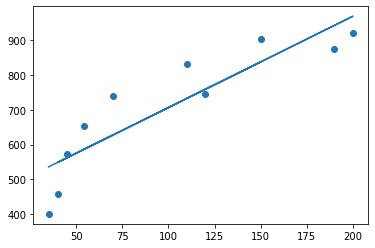

In [6]:
plt.scatter(zp, ks) 
plt.plot(zp, 444.18 + 2.62 * zp) 
plt.show() 

### Ответ:
$𝑦=444.18+2.62∗𝑥$

# 
## Задача 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

### Решение

In [7]:
def mse_(B1, y=ks, x = zp, n = len(zp)):
    return np.sum((B1 * x - y)**2) / n
alpha = 1e-6
B1 = 0.1
n = len(zp)
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * zp - ks) * zp)
    if i % 500 == 0:
        print('Iteration = {i}, B1 = {B1}, mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration = 0, B1 = 0.25952808, mse=493237.7212546963
Iteration = 500, B1 = 5.889815595583751, mse=56516.858416040064
Iteration = 1000, B1 = 5.8898204201285544, mse=56516.85841571941
Iteration = 1500, B1 = 5.889820420132673, mse=56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse=56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse=56516.85841571943


### Ответ:
Коэффициент линейной регрессии равен B1 = 5.889820420132673

# 
## Задача 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение

In [21]:
def mse2_(B0, B1, y=ks, x = zp, n = len(zp)):
    return np.sum((B0 + B1 * x - y)**2) / n

alpha = 1e-6
B1 = 0.1
n = len(zp)

for i in range(3000):
    B0 = np.mean(ks) - B1 * np.mean(zp)
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * zp - ks) * zp)
    if i % 500 == 0:
        print('Iteration = {i}, B0 = {B0}, B1 = {B1}, mse2={mse}'.format(i=i,B0=B0,B1=B1,mse=mse2_(B0,B1)))
        

Iteration = 0, B0 = 699.76, B1 = 0.117616752, mse2=28366.194016105852
Iteration = 500, B0 = 451.8421395386835, B1 = 2.545477630871315, mse2=6490.106541980606
Iteration = 1000, B0 = 444.407219907272, B1 = 2.6182878369495213, mse2=6470.431911817227
Iteration = 1500, B0 = 444.18425077619463, B1 = 2.6204713747935937, mse2=6470.4142171050225
Iteration = 2000, B0 = 444.17756405517065, B1 = 2.6205368578868717, mse2=6470.414201190986
Iteration = 2500, B0 = 444.17736352410225, B1 = 2.6205388216886534, mse2=6470.4142011766735


Таким образом наша модель будет выглядеть:

$y = 444.18 + 2.62 * x$

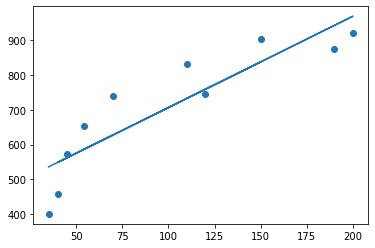

In [16]:
plt.scatter(zp, ks) 
plt.plot(zp, 444.18 + 2.62 * zp) 
plt.show() 

### Ответ:
Коэффициенты линейной регрессии равены:

B0 = 444.18

B1 = 2.62

Модель: $ y = 444.18 + 2.62 * x$